In [12]:
# Building a machine learning model using k-Nearest Neighbors (KNN) algorithm to predict
# whether the patients in the "Pima Indians Diabetes Dataset" have diabetes or not

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('ggplot')

In [19]:
df = pd.read_csv('diabetes.csv')
print(df.head(), '\n', df.columns.values, '\n', df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   
 ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome'] 
 (768, 9)


In [20]:
X = df.drop('Outcome', axis=1).values # Features
y = df['Outcome'].values # label

In [21]:
# The 'stratify' parameter signifies that the train_test_split method returns training and testing subsets that 
# have the same proportions of class labels as the input dataset

# If you don't mention the random_state parameter in the code, then whenever you execute your code a new random 
# value is generated and the train and test datasets would have different values each time
# However, if you use a particular value for random_state (random_state = 1 or any other value) everytime the 
# result will be same,i.e, same values in train and test datasets.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [32]:
# In order to find the most optimal value of 'k', we will find the accuracies of the model for different values
# of 'k'

# Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

print(test_accuracy)

[0.66666667 0.70995671 0.70562771 0.72727273 0.71861472 0.70995671
 0.74025974 0.73593074]


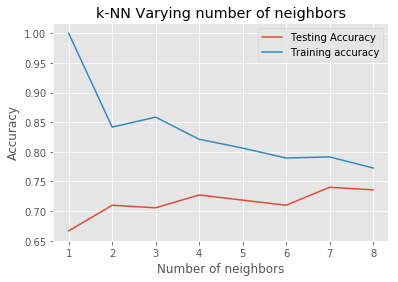

In [33]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [34]:
# We can observe above that we get maximum testing accuracy for k=7. So lets create a KNeighborsClassifier 
# with number of neighbors as 7

knn = KNeighborsClassifier(n_neighbors=7)

#Fit the model
knn.fit(X_train,y_train)

# Get accuracy. Note: In case of classification algorithms, 'score' method represents accuracy.
knn.score(X_test,y_test)

0.7402597402597403